# Iterative Prisoner's Dilemma

__Index__:
 - Brief description of the Prisoner's Dilemma
 - Aim of the project
 - Some informations about the project
 - Running of the project
 - Brief explanation of some main parts of the code
 - Discussion about evolution and mutations
 - Some (many) results

## Description

The Prisoner Dilemma is a "problem" arised in game theory. In a few words, it could be described as follow:


*Two prisoners are interrogated separately, with no chance of speaking with each other. A choice is given to each of them: to speak or to stay silent. If they both speak, they both get 2 years in prison, if they both stay silent they get both 1 year, while if one speaks and the other stays silent, the one who spoke is set free while the other gets 3 years in prison.*

The dilemma arises from the fact that the best outcome would be for the two prisoners to collaborate, thus staying silent, while in game theory for a rational player the best choice would be to speak: indeed if the other stays silent than it would be better to speak in order to be set free, while if the other speaks he'd better speak in order to get the minimum number of years.

## Aim of the project

The aim of this project is to check when and if the cooperation emerges. In order to do so, we are going to generate a population, making them challenge in an iterative way, select the survivors and evolve and mutate them in order to get a new generation.

## Informations about the project

#### Payoffs

The payoffs for each outcome are the following:
 - `Reward payoff = 2` when both prisoners cooperate
 - `Punishment payoff = 1` when both prisoners defect
 - `Temptation = 3 and Sucker = 0 payoff` given, respectively, to the prisoner who defects and to the one who cooperates.


#### Classes of prisoners

Twenty different behaviours have been implemented in this project:
 - Basic ones:
  - `TFT`, `Tit-For-Tat`, starts by cooperating, then copies the move of the opponent in the previous round
  - `Always coop` always cooperates
  - `Always defect` always defects
  - `Mainly nice` mostly cooperates
  - `Mainly bad` mostly defect
  
  
 - Others:
  - `Random` chooses in a random way
  - `NTFT`, `Negative Tit-For-Tat`, starts by defeting, then copies the move of the opponent in the previous round
  - `Angry` starts by always cooperating, but once the opponent defects one time, he'll always defect
  - `Win-Stay` if gets the Temptation or Reward payoff repeats the previous move, otherwise changes
  - `Forgiving Tit-For-Tat` copies the move of the opponent in the previous round,but defects just if the other defects for n consecutive rounds
  - `Punishing Tit-For-Tat` copies the move of the opponent in the previous round, but every time the opponent defects it defects n more times, where n increases by one each time; after punishing the opponent he may apologize cooperating for some rounds without any regard to the opponent's moves
  - `Majority` chooses the move mostly used by the opponent in the previous n rounds
  - `Methodical` has a different probability of cooperating for each possible payoff he gets in the previous round
  - `Changer` starts with a probability of cooperating, then he increases it if the opponent cooperates and decreases it if not
  - `R(s,p,q)` s is the probability of cooperating at the inital round, p the probability of cooperating if the opponent cooperated in the previous round and q if he didn't
  - `Equalizer` is a zero-determinant strategy, or in other words Methodical prisoners with particular fixed probabilities, introduced by Press and Dyson, which guarantees a fixed linear relation between his long-term payoff and the opponent's one; Equalizer is distinguished by the probabilities (3/4,1/4,1/2,1/4), corresponding to (CC,CD,DC,DD), which tries to control the payoff of the opponent
  - `Extort` is similar to Equalizer, with probabilities (7/8,7/16,3/8,0), which has less probability of cooperating if the opponent defects
  - `Generous` is similar to Equalizer as well, with probabilities (1,9/16,1/2,1/8), which has in general more probability of cooperating
  - `Gang` is a group which has a secret sequence of moves: if a member recognizes the opponent as another member, then he will always cooperate, otherwise he will always defect
  - `Antitft` has a secret sequence of moves, if he recognizes the other as a TFT then he will always defect. otherwise will always cooperate
  
The classes whose first move is not clear based on their behaviour have an additional attribute `self.initial`, which is randomly chosen at the creation of the prisoner and tell them what is their first move for each challenge.

#### Types of challenge

Four types of challenge have been implemented in this project:
 - `All vs all` is the round-robin scheme, in which each opponent challenges one time each one of the others
 - `One vs one` couples each prisoner of the population with just one other and make them challenge
 - `n vs n` divides the population in groups of n prisoners and proceed with a round-robin scheme within each group
 - `All vs n` selects n random prisoners from the population and makes each prisoner in the population challenge each one of the randomly selected prisoners

#### Options selection

Some parameters and other features of the project can be modified in the file `Options_many.ipynb`, where it's briefly explained the function of each one of them. In particular it's possible to:
 - change the number of prisoners per population
 - change the number of iterations per challenge
 - set an initial population of all selfish prisoners
 - select the type of challenge
 - set some parameters for the evolution and mutation of the population
 - set the number of epochs the population has to go through
 - select the classes which take part in the competition

## Running of the project - no descriptions

We implement some libraries

In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from IPython.display import Image
%matplotlib inline

and we run the codes which contain the options, the classes and the functions used in the project

In [40]:
%run Classes_many.ipynb
%run Functions_many.ipynb
%run Options_many.ipynb

Thus, we are ready to generate the population zero and to make the prisoners challenge

In [12]:
display_bar_plot(display_bar=display_bar,initial=True)

start_time = time.time()

gen_zero = random_gen(n_gen,all_selfish=initial_all_selfish,n_turns=n_turns,selection_classes=selection_classes)

reset(gen_zero)

if all_vs_all:
    for i in range(len(gen_zero)-1):
        display_bar_plot(display_bar=display_bar,later=True,step=step,n_gen=n_gen)
        for j in range(i+1,len(gen_zero)):
            if i==j:
                break
            challenge_with_det(gen_zero[i],gen_zero[j],n_turns)     
            
if one_vs_one:
    if n_gen%2!=0:
        print("Error: n_gen must be even if you want to play one versus one. \n", \
                "The last element of the generation has been removed")
        gen_zero = gen_zero[:-1]
    opponents = np.random.choice(len(gen_zero),(int(n_gen/2),2),replace=False)
    for couple in opponents:
        challenge_with_det(gen_zero[couple[0]],gen_zero[couple[1]],n_turns)
        
if n_vs_n:
    if n_gen%n_per_group!=0:
        print("Error: n_gen must be even if you want to play one versus one. \n", \
                "The last %i element/s of the generation has/have been removed" %(n_gen%n_per_group))
        gen_zero = gen_zero[0:-int(n_gen%n_per_group)]
    opponents = np.random.choice(len(gen_zero),(int(n_gen/n_per_group),n_per_group),replace=False)
    for group in opponents:
        for i in range(n_per_group-1):
            for j in range(i+1,n_per_group):
                challenge_with_det(gen_zero[group[i]],gen_zero[group[j]],n_turns)
                
if all_vs_n:
    challengers = np.random.choice(len(gen_zero),n_challengers,replace=False)
    challengers = [gen_zero[i] for i in challengers]
    for pris1 in gen_zero:
        for pris2 in challengers:
            challenge_with_det_avn(pris1,pris2,n_turns)

display_bar_plot(display_bar=display_bar,close=True)      

finish_time = time.time()
print('Total time elapsed: ', finish_time-start_time)

Total time elapsed:  20.10569167137146


Here the main steps of the code are reported, while the others are hidden in `function_many.ipynb`. In the evaluation of the evolved generations all this code above will be hidden in the function `evaluate_gen...()`. Some points of the code will be later discussed in the dedicated section.

Finally, we are able to make the population evolve and mutate through some epoch, which number can be as well changed in the options. The code is the following

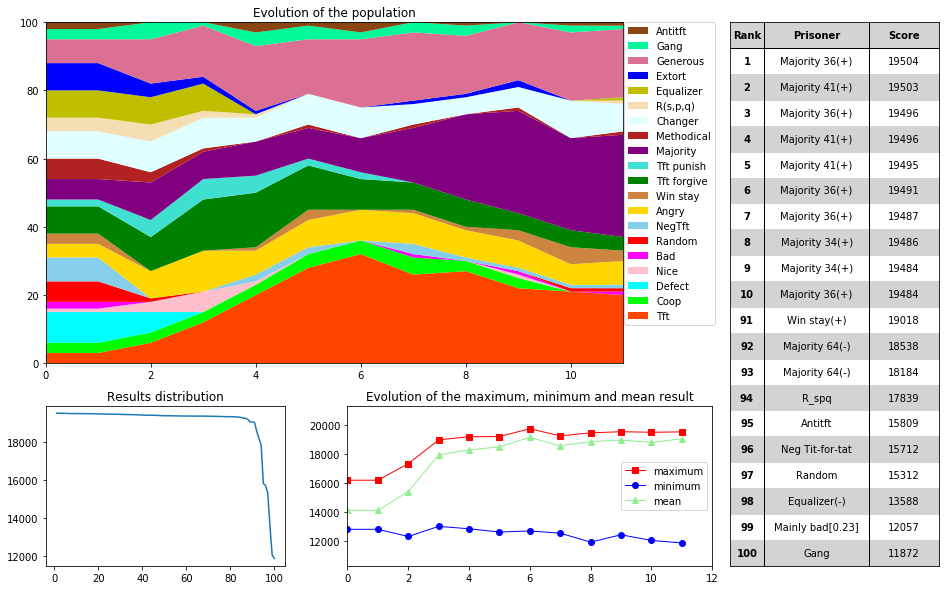

In [14]:
density_pop,maxima,minima,mean,fig = start_4_plot(gen_zero)

new_gen = evolve(gen_zero,offset=offset,power=power,show=False,controlled_mutation=controlled_mutation,
                 random_mutation=random_mutation,prob_gang=prob_gang,prob_antitft=prob_antitft,n_rounds=n_turns,
                 selection_classes=selection_classes)

for i in range(1,n_epoch+1):
    if all_vs_all:
        evaluate_gen_all_vs_all(new_gen,display_bar=False,n_turns=n_turns)
    if one_vs_one:
        evaluate_gen_one_vs_one(new_gen,n_turns)
    if n_vs_n:
        evaluate_gen_n_vs_n(new_gen,n_turns,n_per_group)
    if all_vs_n:
        evaluate_gen_all_vs_n(new_gen,n_turns,n_challengers)
    density_pop,maxima,minima,mean = update_4_plot(new_gen,density_pop,year=i-1,end=n_epoch-1,
                                                   fig=fig,maxima=maxima,minima=minima,mean=mean)
    new_gen = evolve(new_gen,show=False,offset=offset,power=power,controlled_mutation=controlled_mutation,
                     random_mutation=random_mutation,prob_gang=prob_gang,prob_antitft=prob_antitft,
                     n_rounds=n_turns,selection_classes=selection_classes)

Here the evolution of the population composition is showed, along with the evolution of the maximum, minimum and mean result. It's also reported the chart for the epoch and the distribution of the results of the epoch, which therefore don't keep the memory of the previous generations.

## Brief explanation of some main parts of the code

### Code regarding the evaluation of the generation zero

We report here the code, for the sake of clarity

In [ ]:
display_bar_plot(display_bar=display_bar,initial=True)

start_time = time.time()

gen_zero = random_gen(n_gen,all_selfish=initial_all_selfish,n_turns=n_turns,selection_classes=selection_classes)

reset(gen_zero)

if all_vs_all:
    for i in range(len(gen_zero)-1):
        display_bar_plot(display_bar=display_bar,later=True,step=step,n_gen=n_gen)
        for j in range(i+1,len(gen_zero)):
            if i==j:
                break
            challenge_with_det(gen_zero[i],gen_zero[j],n_turns)     
            
if one_vs_one:
    if n_gen%2!=0:
        print("Error: n_gen must be even if you want to play one versus one. \n", \
                "The last element of the generation has been removed")
        gen_zero = gen_zero[:-1]
    opponents = np.random.choice(len(gen_zero),(int(n_gen/2),2),replace=False)
    for couple in opponents:
        challenge_with_det(gen_zero[couple[0]],gen_zero[couple[1]],n_turns)
        
if n_vs_n:
    if n_gen%n_per_group!=0:
        print("Error: n_gen must be even if you want to play one versus one. \n", \
                "The last %i element/s of the generation has/have been removed" %(n_gen%n_per_group))
        gen_zero = gen_zero[0:-int(n_gen%n_per_group)]
    opponents = np.random.choice(len(gen_zero),(int(n_gen/n_per_group),n_per_group),replace=False)
    for group in opponents:
        for i in range(n_per_group-1):
            for j in range(i+1,n_per_group):
                challenge_with_det(gen_zero[group[i]],gen_zero[group[j]],n_turns)
                
if all_vs_n:
    challengers = np.random.choice(len(gen_zero),n_challengers,replace=False)
    challengers = [gen_zero[i] for i in challengers]
    for pris1 in gen_zero:
        for pris2 in challengers:
            challenge_with_det_avn(pris1,pris2,n_turns)

display_bar_plot(display_bar=display_bar,close=True)      

finish_time = time.time()
print('Total time elapsed: ', finish_time-start_time)

 - `display_bar_plot()` is a function which allows to display a progression bar; it is only implemented for the all vs all challenge, since it's the slowest one, and it's possible to turn this option on and off in the options, through the parameter `display_bar`
 - the function `time.time()` is used to show the time taken to evaluate the whole generation, which is printed at the end
 - `random_gen()` is the function which generates the generation zero, it takes into consideration the classes chosen in the options through the parameter `selection _classes`; it's also possible to start with a population of all defecting prisoners through the parameter `initial_all_selfish`
 - the function `challenge_with_det()` is the core of the evaluation of the competition: it tries to check if it already knows the results of the challenge between two prisoners, thus updating the results without actually performing the challenge, if not it tries to see if one of the two prisoners or both has a behaviour which is independent from the other, thus not going through every single step of the challenge, otherwise if it can't go through any of these, it performs the actual challenge step by step

### Code regarding the evolution of the population

As above, for the sake of clarity we report down here the code

In [ ]:
density_pop,maxima,minima,mean,fig = start_4_plot(gen_zero)

new_gen = evolve(gen_zero,offset=offset,power=power,show=False,controlled_mutation=controlled_mutation,
                 random_mutation=random_mutation,prob_gang=prob_gang,prob_antitft=prob_antitft,n_rounds=n_turns,
                 selection_classes=selection_classes)

for i in range(1,n_epoch+1):
    if all_vs_all:
        evaluate_gen_all_vs_all(new_gen,display_bar=False,n_turns=n_turns)
    if one_vs_one:
        evaluate_gen_one_vs_one(new_gen,n_turns)
    if n_vs_n:
        evaluate_gen_n_vs_n(new_gen,n_turns,n_per_group)
    if all_vs_n:
        evaluate_gen_all_vs_n(new_gen,n_turns,n_challengers)
    density_pop,maxima,minima,mean = update_4_plot(new_gen,density_pop,year=i-1,end=n_epoch-1,
                                                   fig=fig,maxima=maxima,minima=minima,mean=mean)
    new_gen = evolve(new_gen,show=False,offset=offset,power=power,controlled_mutation=controlled_mutation,
                     random_mutation=random_mutation,prob_gang=prob_gang,prob_antitft=prob_antitft,
                     n_rounds=n_turns,selection_classes=selection_classes)

 - `start_4_plot()` and `update_4_plot()` are in charge of showing the 4 plots as above
 - `evolve()` evolves the population with regards the results they achieved, selecting the survivors and generating the children through possible mutations; the aspects regarding these last two points will be found in a section below
 - `evaluate_gen...()` computes the results of the generation, through a code similar to the one shown above for the generation zero

### Code regarding the classes

Here we are going to take as an example a class of prisoner in order to explain its main features

In [ ]:
class mainly_nice:
    
    def __init__(self,contestant=0,result=0,k=0.8):
        self.class_n = 3
        self.contestant = contestant
        self.result = result
        self.prob = k
        self.type = 'Mainly nice[%.2f]' %self.prob
        
    def choice(self,data):
        return np.random.choice(2, p=[1-self.prob,self.prob])
    
    def choice_det(self,n_times):
        return np.random.choice(2, p=[1-self.prob,self.prob], size=n_times).astype(int)
    
    def mutate(self,controlled_mutation,random_mutation,prob_gang,prob_antitft,count_tft,n,possible_classes=['False']):
        children = []
        mutation_probability = np.random.uniform(0,1,2)
        mutations = [1-controlled_mutation-random_mutation-prob_gang-prob_antitft*count_tft,random_mutation,prob_gang,prob_antitft*count_tft]
        mutations = np.cumsum(mutations)
        remaining_prob = 1-mutations[-1]
        for i in mutation_probability:
            if i<mutations[0]:
                children.append(mainly_nice(k=self.prob))
                continue
            elif i<mutations[1]:
                while True:
                    if possible_classes[0]!='False':
                        mutate = np.random.choice(possible_classes)
                    else:
                        mutate = np.random.randint(20)
                    if mutate==self.class_n:
                        continue
                    children.append(translate(mutate,n))
                    break
                continue
            elif i<mutations[2]:
                children.append(translate('gang',n))
                continue
            elif i<mutations[3]:
                children.append(translate('antitft',n))
                continue
            elif i<mutations[-1]+remaining_prob*4/12:
                k = np.random.normal(self.prob,0.1)
                if k>=1:
                    children.append(translate('Good',n))
                    continue
                elif k<=0:
                    children.append(translate('Bad',n))
                    continue
                elif k<0.5:
                    children.append(mainly_bad(k=k))
                    continue
                children.append(mainly_nice(k=k))
                continue
            elif i<mutations[-1]+remaining_prob*10/12:
                decision = np.random.choice(3)
                if decision==0:
                    children.append(translate('Good',n))
                elif decision==1:
                    children.append(translate('random',n))
                else:
                    children.append(translate('bad',n))
                continue
            elif i<mutations[-1]+remaining_prob*11/12:
                children.append(translate('Bad',n))
                continue
            else:
                decision = np.random.choice(2)
                if decision==0:
                    children.append(translate('majority',n))
                else:
                    children.append(translate('changer',n))
                continue
        return children    

 - in the initialize section `__init__` the attributes of each class are initialized; some classes, like `TFT`, don't have any, while others, like this one, do and the values of the attributes are passed during the creation of the prisoner. Other classes have as well other particular attributes which are not set at the creation of the prisoner but are used as "helping" features through the challenges. Also, for the classes whose first move is not established by their behaviour, a further attribute is added `self_initial` defined randomly at the creation of the prisoner which tells them the first move for each challenge;
 - the `choice()` function is used to evaluate the proper challenge step by step;
 - the `choice_det()` is used for prisoners whose choice doesn't depend on the choices of the opponent, in order to quickly generates all the choices; for the prisoners who don't share this feature, there is another function called `choice_if_det()`, which tries to evaluate in the fastest possible way the choices against a deterministic (i.e. which uses `choice_det()`) prisoner;
 - `mutate()` is the function in charge of generating two children for each survived prisoner; the logic behind it is explained in the following section.

## Evolution and Mutations

### Evolution

In this section we are going to discuss about the first part of the process of generating a new population, the **_natural selection_**.

This is achieved inside the following function

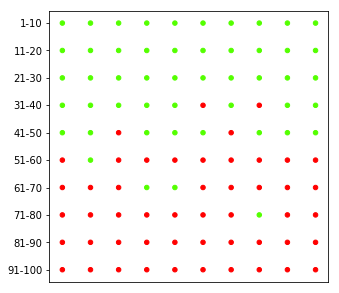

In [31]:
_ = evolve(gen_zero,offset=offset,power=power,show=True,n_rounds=n_turns,selection_classes=selection_classes)

where the red dots represent the dead prisoners while the green ones the prisoners survived.

This function selects the survivors basing the decision on two parameters: `offset` and `power`. The process consists in using, as the survival probability, a distribution which corresponds to the results achieved, as shown below

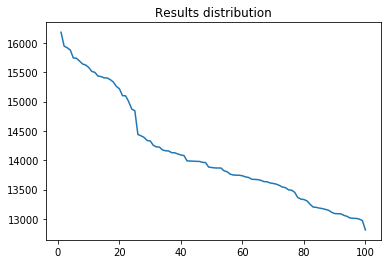

In [27]:
chart = make_chart(gen_zero)
plt.plot(chart.index,chart.Result)
_ = plt.title("Results distribution")

where the minimum result is set to zero and then the distribution is then normalized. The parameter `power` elevate this distribution to a certain power, which is possible to change in the options, in order to enhance the survival probability of high scores;  the parameter `offset`, on the contrary, add a constant to the distribution in order to enhance the chance of surviving of the low scores, which otherwise, for some prisoners, would be zero.

An example of the effect of the parameter `power` is shown in the figures below, where `power` is set to 1.5, 4, 10 and 100, respectively from top-left in clockwise order.

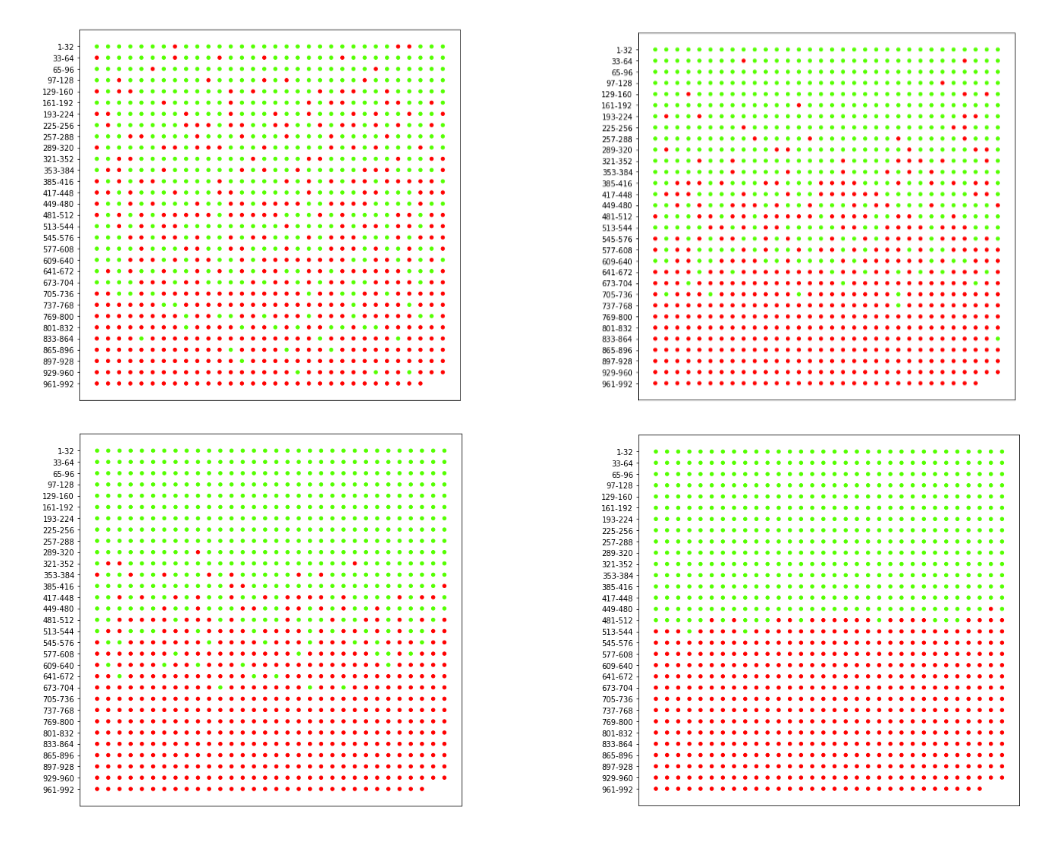

In [34]:
from IPython.display import Image
Image('Images/Example_evolution.png')

### Mutations

Here we are going to discuss about the second part, generating the children for the new generation. This is achieved through the same function `evolve()`, which contains a function `generate_mutations()` as follow

In [ ]:
def generate_mutations(gen_new,n_rounds,controlled_mutation,random_mutation,prob_gang,prob_antitft,
                       selection_classes=[False]):
    gen_add = []
    count_tft = [1 for pris in gen_new if (pris.class_n==0 or pris.class_n==6)]
    count_tft = np.sum(count_tft)/len(gen_new)
    if selection_classes[0]==True:
        selected_classes = True
        if selection_classes[1]==1:
            possible_classes = [0,1,2,3,4]
        else:
            possible_classes = [i-2 for i in range(2,len(selection_classes)) if selection_classes[i]==1]
    else:
        selected_classes = False
    
    for prisoner in gen_new:
        if selected_classes:
            accepted = False
            while not accepted:
                children = prisoner.mutate(controlled_mutation=controlled_mutation,random_mutation=random_mutation,
                                           prob_gang=prob_gang,prob_antitft=prob_antitft,count_tft=count_tft,
                                           n=n_rounds,possible_classes=possible_classes)
                for pris in children:
                    if not pris.class_n in possible_classes:
                        accepted = False
                        break
                    accepted = True
        else:
            children = prisoner.mutate(controlled_mutation=controlled_mutation,random_mutation=random_mutation,
                                        prob_gang=prob_gang,prob_antitft=prob_antitft,count_tft=count_tft,
                                        n=n_rounds)
        gen_add += children
    return(gen_add)

which recall the `mutate()` function of the prisoner class.

The mutations are divided in 4 possibilities, which can coexist, as shown in the figure below

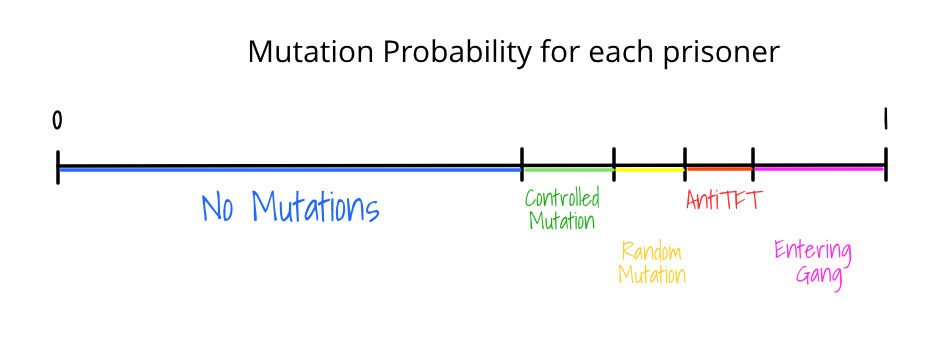

In [28]:
from IPython.display import Image
Image('Images/Mutation_scheme.png')

The parameters that can be controlled, in `options_many.ipynb` are:
 - `controlled_mutation` is the probability of mutating in a controlled way, as explained below;
 - `random_mutation` is the probability of mutating randomly in any other class;
 - `prob_gang` is the probability of entering the gang;
 - `prob_antitft` is, multiplied with the fraction of `tft` and `antitft` in the population, the probability of developing and antitft behaviour.

Obviously their sum must be less or equal to one and the probability of no mutations is one minus the sum of these probabilities above.

Regarding the controlled mutation, the classes have been divided in groups which better describe them:
 - `Dumb` consists in the classes whose choices don't depend on the choices of the opponent;
 - `Smart` consists in the classes whose choices depend on the opponent's ones in a deterministic way;
 - `Meticulous` consists in the classes which have a different probability of cooperating for each possible outcome of the previous round
 - `Gang` makes a class on itself;
 - `Angry` consists in the two classes `antitft` and `angry`.
 
This kind of mutations are controlled in the sense that classes belonging to the same group have more probability of mutating one in the other. Also, if a class has some attributes defined at the creation of a prisoner, that class can mutate in a controlled way in itself in the sense that it can be generated a prisoner of the same class whose attributes are slightly changed. The mutations within the same group are not equal for all the classes belonging in the group, but the similarities between each couple of classes have been evaluated for a more realistic outcome.

The classification is shown in the following figure

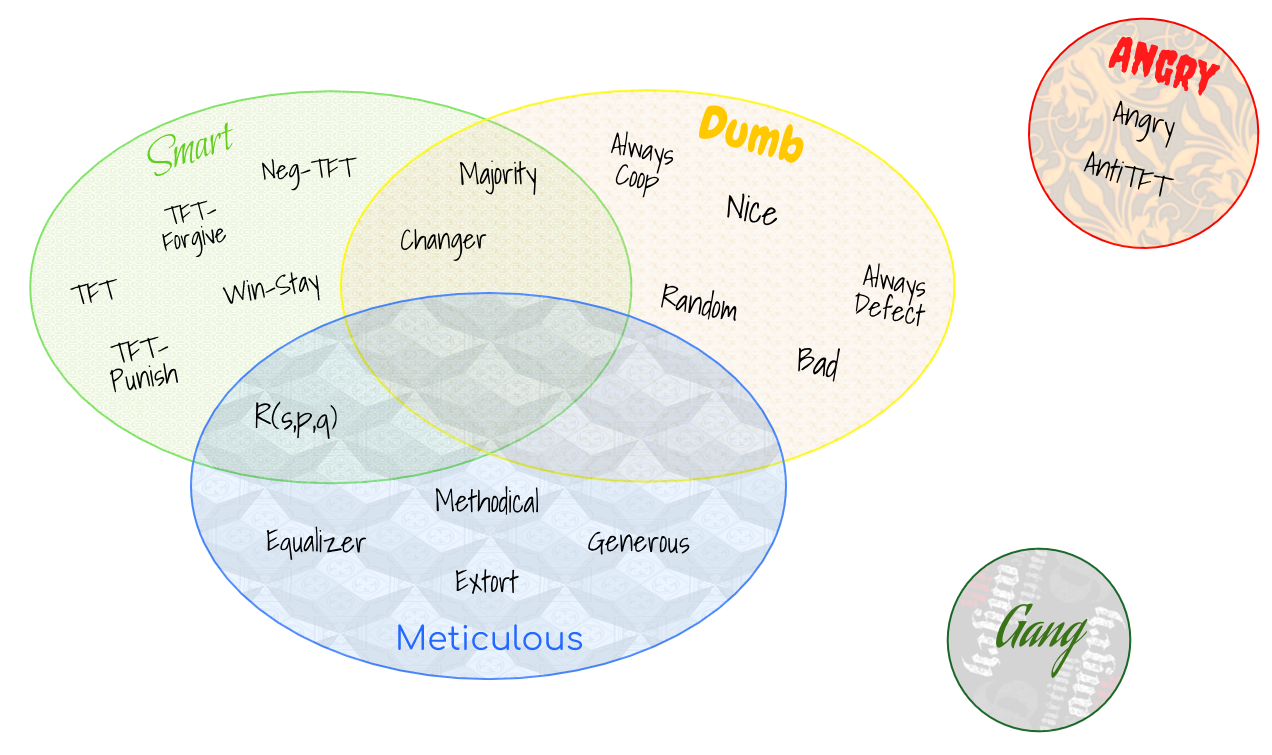

In [2]:
from IPython.display import Image
Image('Images/Mutation_classes.png')

## Some results

### Basic classes

#### Difference in time between `challenge()` and `challenge_with_det()`

In [33]:
n_gen = 500
n_turns = 100
selection_classes = [True,1]

start_time = time.time()

gen_zero = random_gen(n_gen,all_selfish=initial_all_selfish,n_turns=n_turns,selection_classes=selection_classes)

for i in range(len(gen_zero)-1):
    for j in range(i+1,len(gen_zero)):
        if i==j:
            break
        challenge_with_det(gen_zero[i],gen_zero[j],n_turns)         

finish_time = time.time()
print('Total time elapsed challenge_with_det(): ', finish_time-start_time)

start_time = time.time()

gen_zero = random_gen(n_gen,all_selfish=initial_all_selfish)

for i in range(len(gen_zero)-1):
    for j in range(i+1,len(gen_zero)):
        if i==j:
            break
        challenge(gen_zero[i],gen_zero[j],n_turns)         

finish_time = time.time()
print('Total time elapsed challenge(): ', finish_time-start_time)

Total time elapsed challenge_with_det():  8.05544376373291
Total time elapsed challenge():  405.175377368927


#### Generic case

n_gen = 1000; n_turns = 100; mutation_prob = 0.05; all_vs_all = True; n_epoch = 20

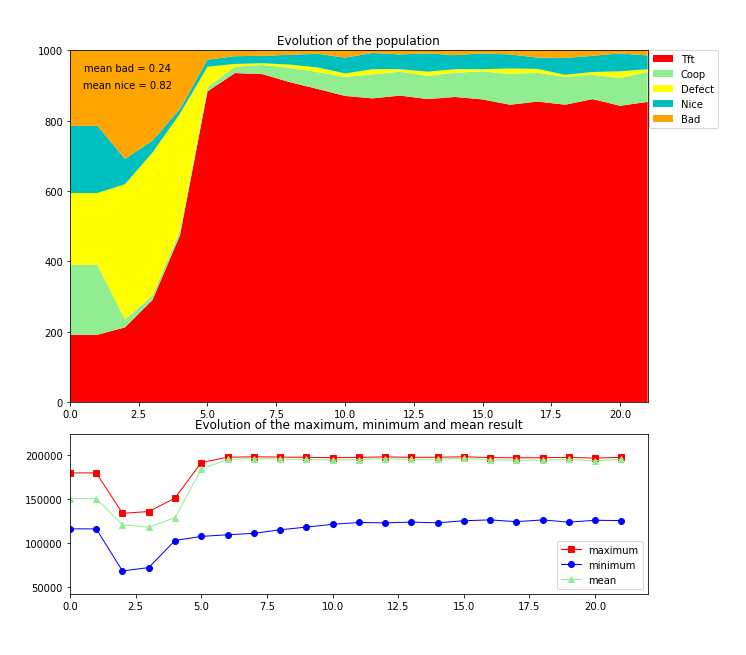

In [35]:
Image('Images/basic_generic.png')

In the generic case, the bad behaviour, i.e. defecting, initially prevails everytime; this is due to a relative abundancy of "good" prisoners, against which "bad" prisoners gain a lot of points. Once the number of good prisoners decreases, they no more gain many Temptation payoffs, thus their results will get pretty low, as it's possible to notice as well in the plot showing the evolution of the maximum, mean and minimum results. After that the tft gain a lot of power, thus killing a lot of bad prisoners; then good prisoners have the chance to flourish again.

#### Initial all selfish

n_gen = 500; n_turns = 100; mutation_prob = 0.05; all_vs_all = True; initial_all_selfish = True; n_epoch = 20

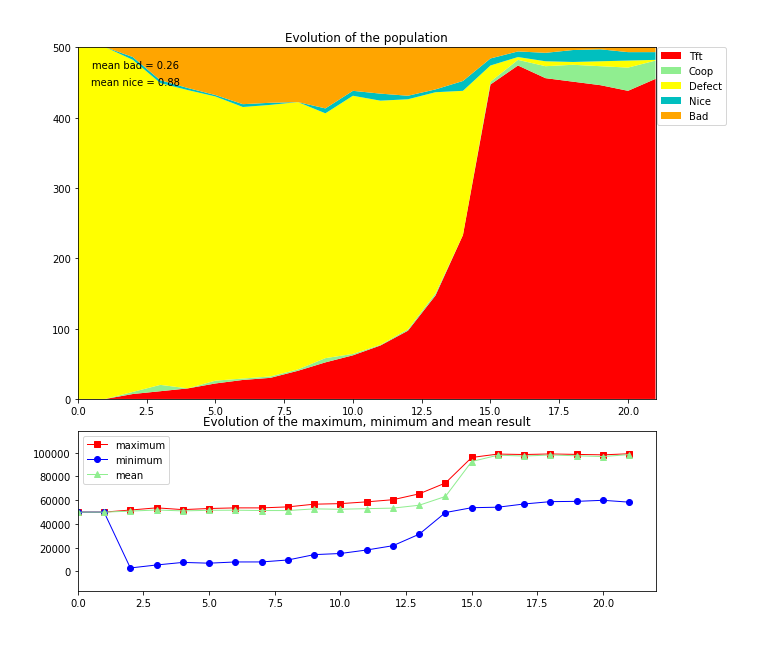

In [36]:
Image('Images/basic_initial_all_selfish.png')

Here is possible to see that tfts win as well, but they take much more time, while at the beginning the mainly bad prisoners find some space to flourish.

#### No mutations

n_gen = 500; n_turns = 100; mutation_prob = 0; all_vs_all = True; n_epoch = 20

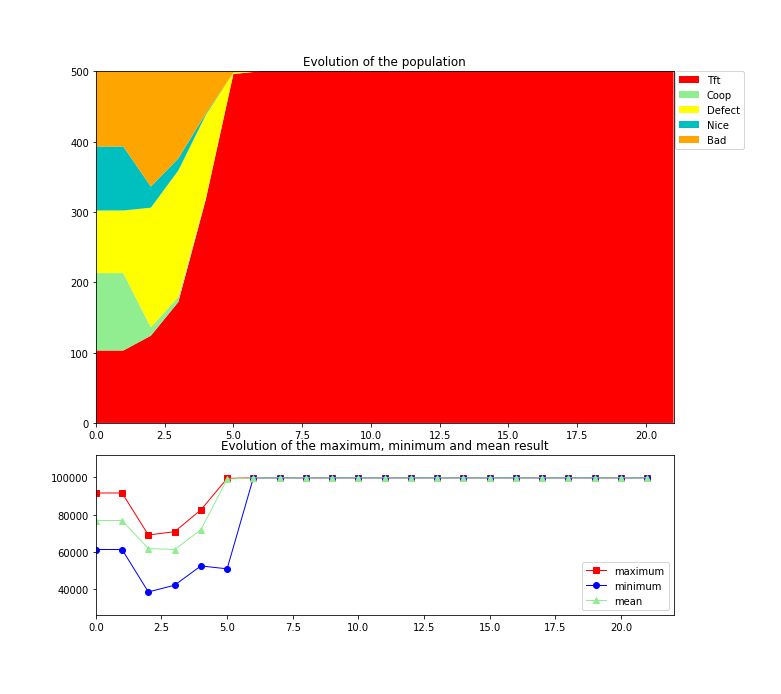

In [38]:
Image('Images/no_mutations.png')

The outcome with no mutations is the pretty similar.

#### 1 vs 1 type of challenge

n_gen = 2000; n_turns = 100; mutation_prob = 0.05; one_vs_one = True; n_epoch = 80

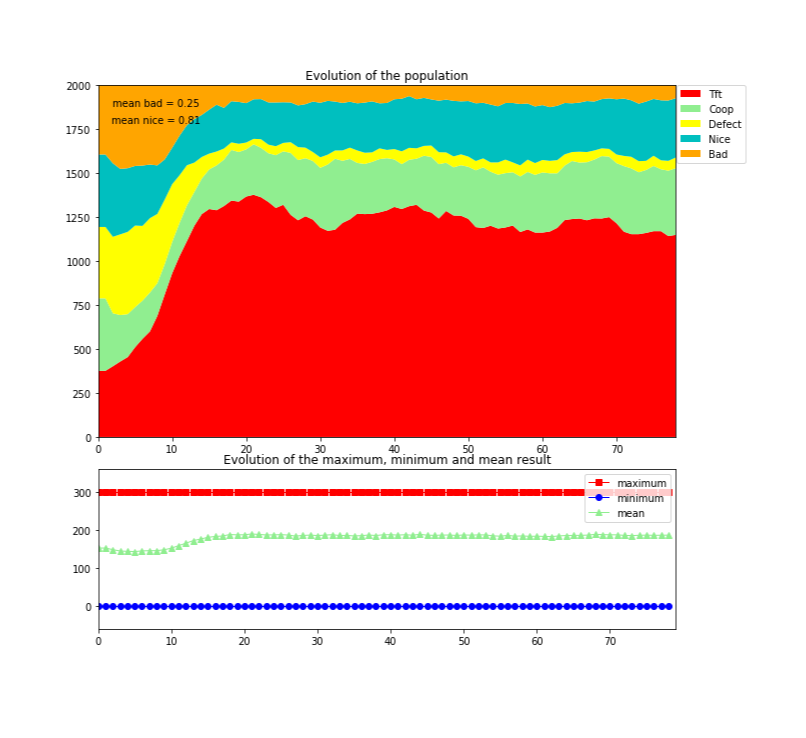

In [42]:
Image('Images/1vs1.png')

The outcome is similar, even though the number of tft at the end is a bit lower.

However, if we raise the probability of mutation, the output is really different and all the classes at the end are present almost at the same number, with the mainly bad slightly leading, like it's possible to see in the following simulation

n_gen = 2000; n_turns = 100; mutation_prob = 0.2; one_vs_one = True; n_epoch = 80

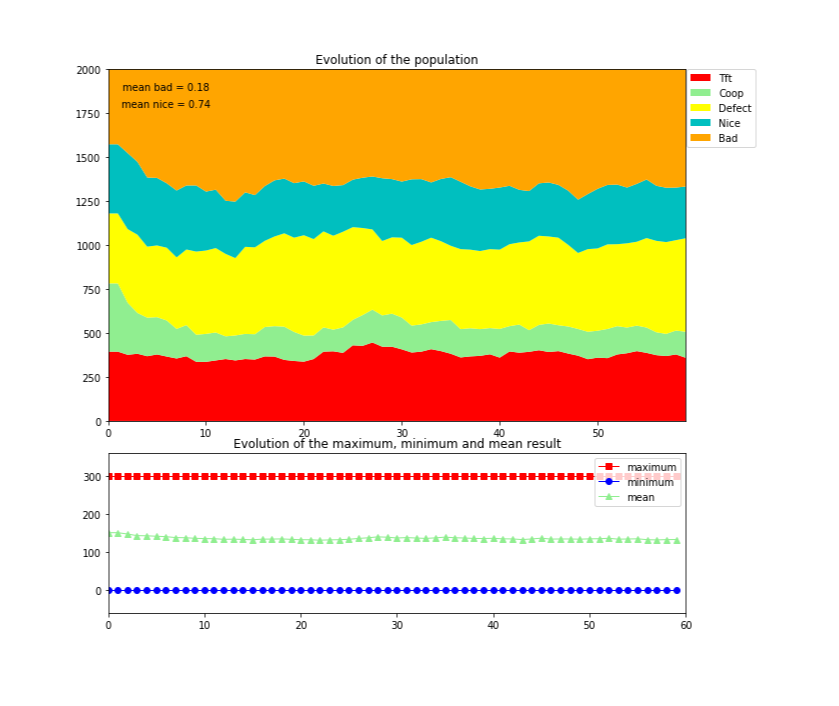

In [44]:
Image('Images/1vs1_2.png')

#### n vs n type of challenge

n_gen = 2000; n_turns = 100; mutation_prob = 0.05; n_vs_n = True; n_per_group = 3; n_epoch = 100

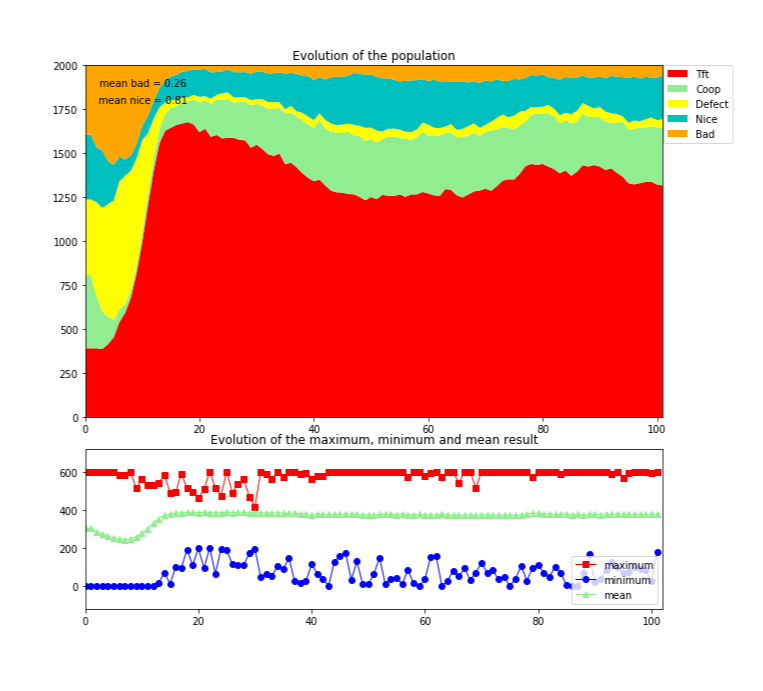

In [41]:
Image('Images/3vs3.png')

The outcome is the same, even with just 3 members per group; the number of tfts is a bit lower though.

With more prisoners per group the outcome get more and more similar to the round-robin one; already with 10 prisoners per group the outcome has only really slight differences with respect the all vs all one.

#### All vs n

n_gen = 1000; n_turns = 100; mutation_prob = 0.05; all_vs_n = True; n_challengers = 3; n_epoch = 25

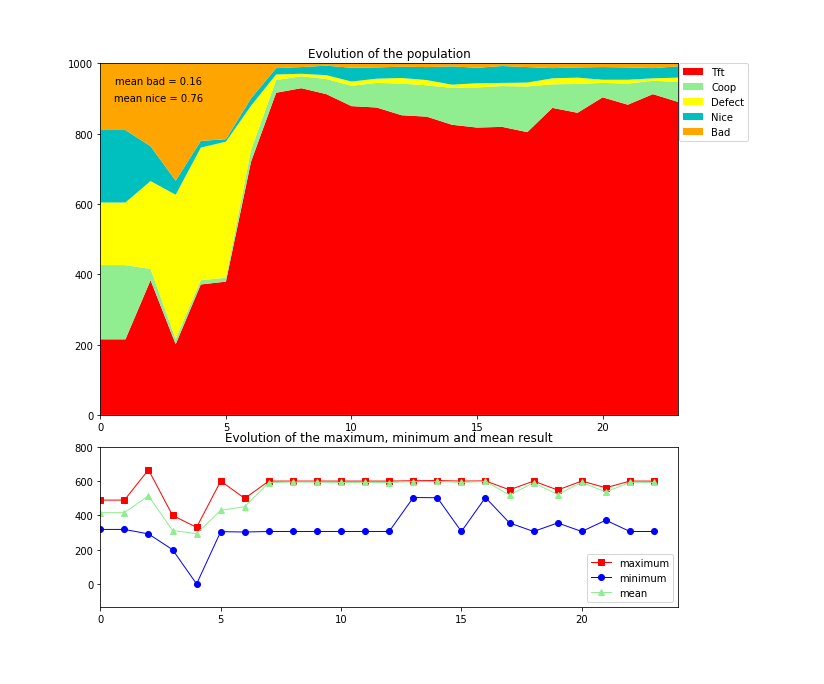

In [47]:
Image('Images/allvs3.png')

The `all_vs_n` kind of challenge with a small number of random challengers presents really more fluctuations, due indeed to which random prisoners have been chosen, since some of them will help some classes while penalizing others. Anyway, the final outcome is pretty similar.

With more randomly chosen prisoners the outcome get more and more similar to the round-robin one; already with 10 randomly chosen prisoners the outcome has only really slight differences with respect the all vs all one.

### All the classes

Since from the previous simulations we saw that the final outcome doesn't depend so much on the type of challenge chosen, we are not going to use the `all_vs_all` one, since is the slowest, in favor of other faster ones.

#### Generic case

n_gen = 500; n_turns = 100; n_vs_n = True; n_per_group = 14; n_epoch = 20;controlled_mutation = 0.05; random_mutation = 0.05; prob_gang = 0.02; prob_antitft = 0.01

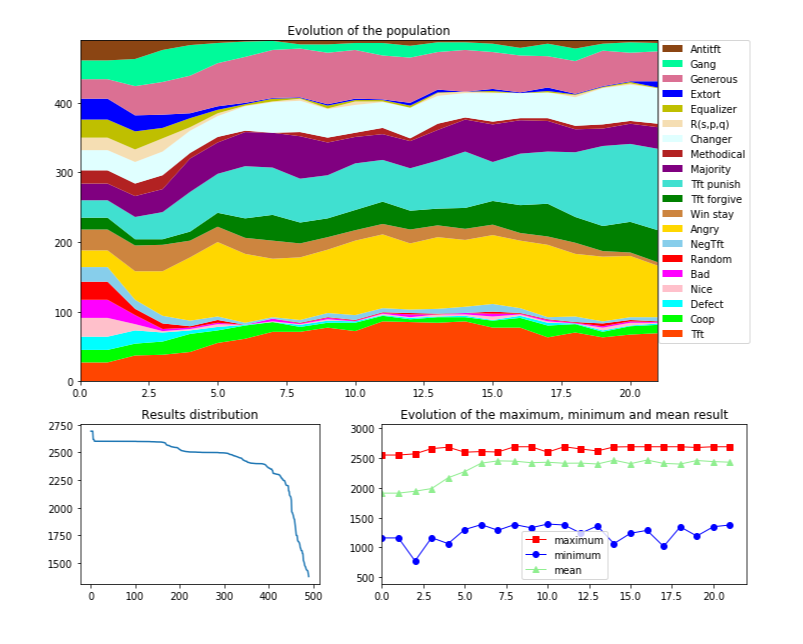

In [50]:
Image('Images/many/generic.png')

If all the classes are used, the tfts are no more the prevailing ones. However, it's possible to notice that the classes that flourish are the ones which behave good if the opponent behave good, as the `TFT`, `Angry`, `TFTForgive`, `TFTPunish`, `Majority`, `Changer`(which arrive pretty early to 1 of probability of cooperating) and `Generous`. The main ones seem to be the `Angry` and `TFTPunish`; with regard to the `Always cooperating` ones, they seem similar to the other ones, but the main difference is the fact that the other classes punish as well who doesn't cooperate, anyway they are present in a slighly higher number than the "bad" classes.

#### Initially all selfish

n_gen = 500; n_turns = 100; n_vs_n = True; n_per_group = 14; n_epoch = 20;controlled_mutation = 0.05; random_mutation = 0.05; prob_gang = 0.01; prob_antitft = 0.01; initial_all_selfish = True

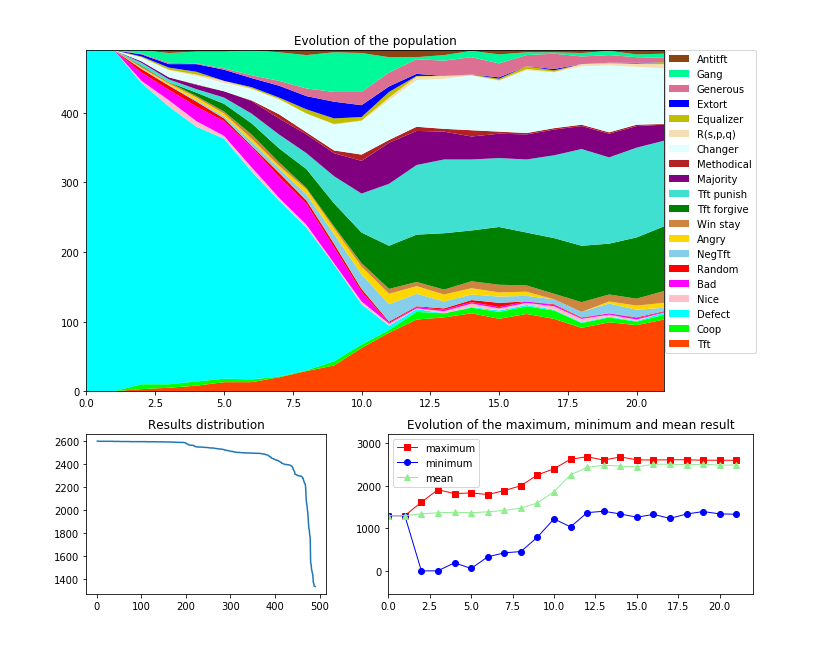

In [55]:
Image('Images/many/initialallselfish.png')

The outcome is really similar, but this time the `angry` didn't manage to flourish as before. However, this is due to the fact that the bad classes highly suppress their result. In addition, and regarding this last point, it's possible to see that, due to the high presence of `always defecting` the bad classes, like `mainly bad`, manage to find more space, but then get "killed" by the good classes.

#### Initially all selfish with just controlled mutations

n_gen = 500; n_turns = 100; all_vs_n = True; n_challengers = 30; n_epoch = 40;controlled_mutation = 0.1; random_mutation = 0; prob_gang = 0; prob_antitft = 0; initial_all_selfish = True

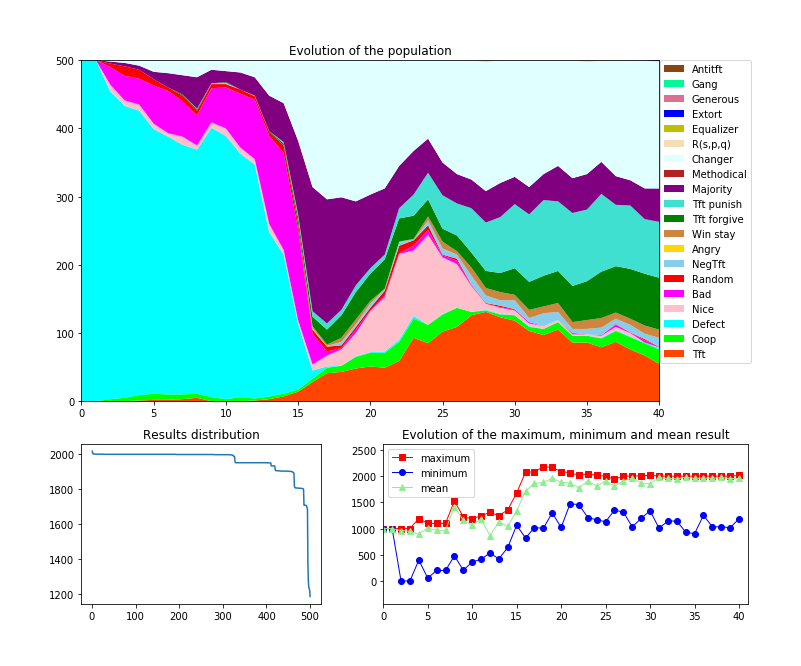

In [56]:
Image('Images/many/selfishcontrolled.png')

In the controlled mutations, as it's possible to see in the dedicated section, the `always defect` can most of all mutate in `always coop`, `mainly bad`, `mainly nice`, `random`, `majority` and `changer`, then from these last two they can mutate in almost all the other classes, directly or through other passages, except from `angry`, `antitft` and `gang`. Indeed the `mainly bad` are the first other class to flourish, then the rest of the outcome is pretty similar, with the `changers` gaining a bit more prisoners, indeed they are the first class, together with `majority`(which for a couple of generations is the dominant class together with the changers), to be produced with the ability of mimicking the opponent's moves, thus gaining a consistent initial population which puts them in a slighlty better position than the other good classes.

#### Initially all selfish with just random mutations

n_gen = 500; n_turns = 100; all_vs_n = True; n_challengers = 30; n_epoch = 40;controlled_mutation = 0; random_mutation = 0.1; prob_gang = 0; prob_antitft = 0; initial_all_selfish = True

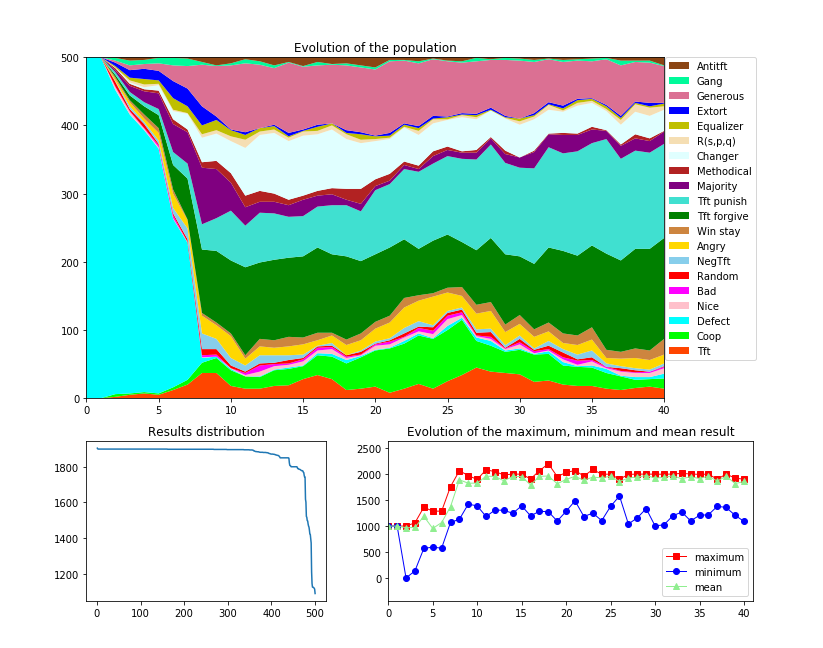

In [57]:
Image('Images/many/selfishrandom.png')

The outcome is pretty similar, with the only difference that `tftpunish` and `tftforgive` seem to gain a bit more power.

#### 1 vs 1

n_gen = 500; n_turns = 100; one_vs_one = True; n_epoch = 50;controlled_mutation = 0.05; random_mutation = 0.05; prob_gang = 0.01; prob_antitft = 0.001

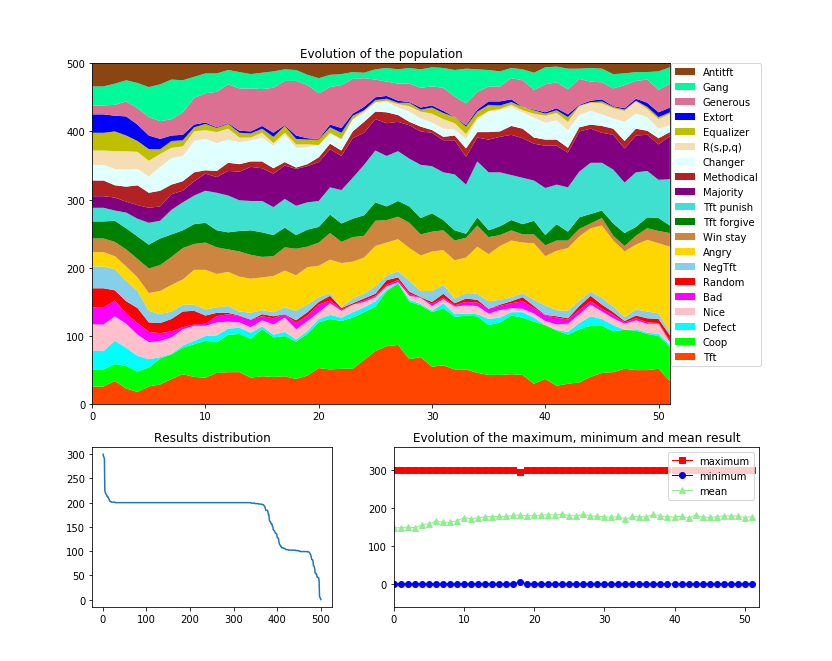

In [58]:
Image('Images/many/1vs1.png')

As in the case with the five basic classes, the reached outcome is pretty similar but it takes more generations to be reached. A slight difference is that the `always cooperative` manage to find more space, this is due to the fact that really often they have to challenge prisoners who will always cooperate.

#### No mutations

n_gen = 500; n_turns = 100; n_vs_n = True; n_per_group = 14; n_epoch = 12;controlled_mutation = 0; random_mutation = 0; prob_gang = 0; prob_antitft = 0

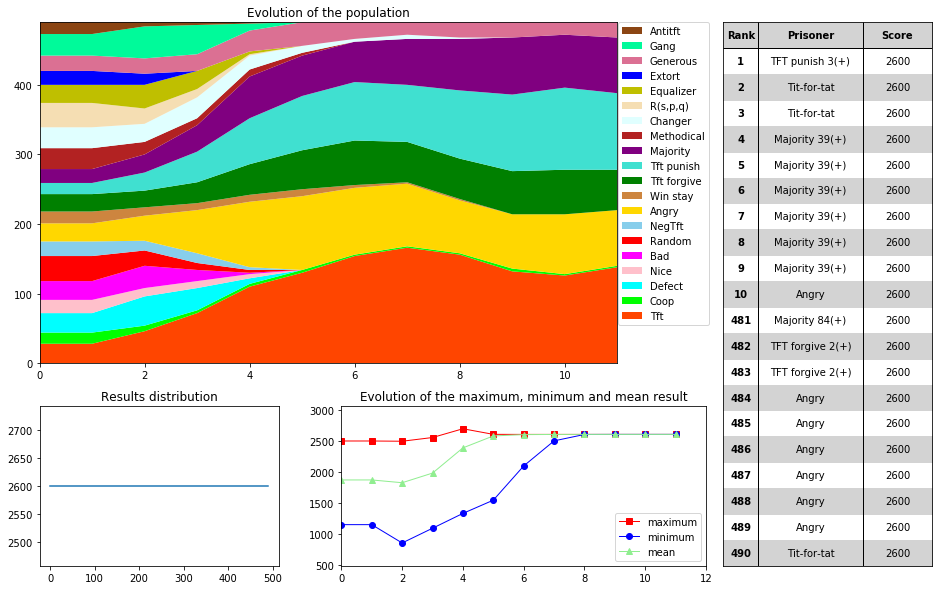

In [60]:
Image('Images/many/nomutations.png')

It's possible to see that without any mutation, already after 10 generations an equilibrium is reached and thus it's meaningless to proceed with the simulation: indeed all the prisoners always cooperate, thus all of them will score the same result. The bad classes are all wiped away after 5-6 generations.

#### Strong gang

n_gen = 500; n_turns = 100; n_vs_n = True; n_per_group = 14; n_epoch = 10; controlled_mutation = 0.1; random_mutation = 0.05; prob_gang = 0.15; prob_antitft = 0

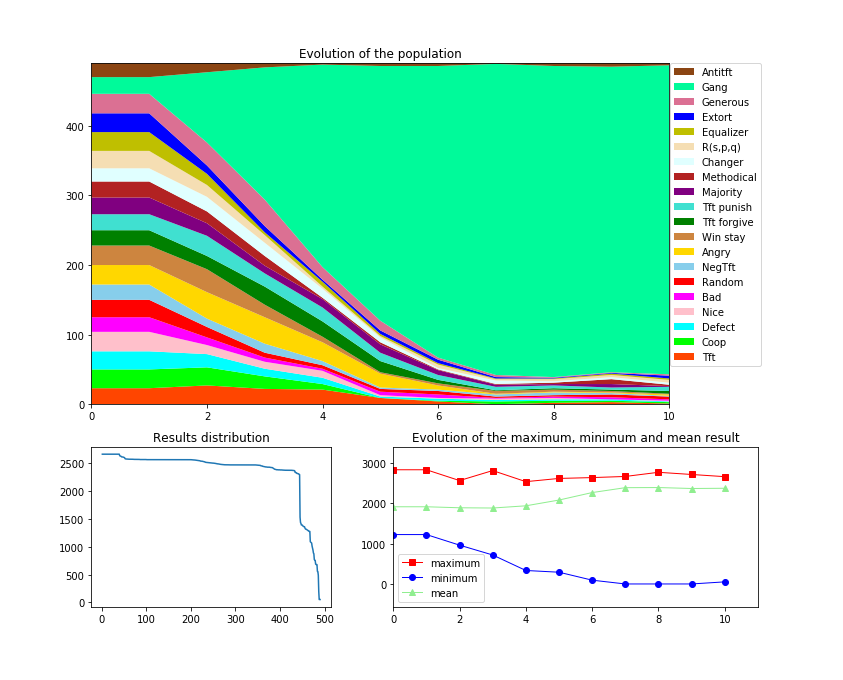

In [61]:
Image('Images/many/gang.png')

It's possible to see that the `gang` has a strong dominating behaviour if the probability of entering a gang passes a certain limit; here the probability is set to 0.15 and the dominating behaviour is already obvious.

#### Losers competition

n_gen = 500; n_turns = 100; n_vs_n = True; n_per_group = 14; n_epoch = 30; controlled_mutation = 0.08; random_mutation = 0.05; prob_gang = 0; prob_antitft = 0

Classes used: alwayscoop, alwaysdef, mainlynice, mainlybad, random, winstay, methodical, rspq, equalizer, extort, antitft.

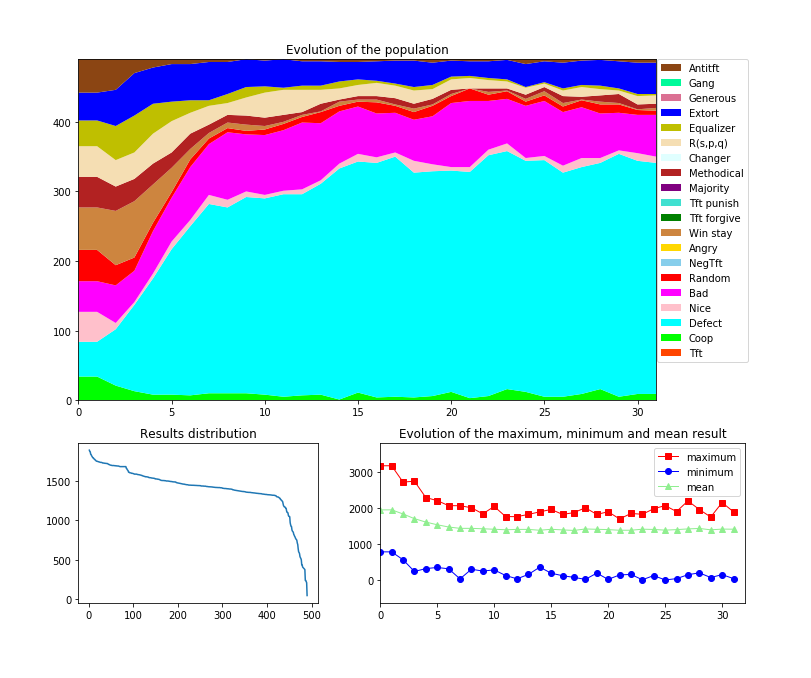

In [4]:
Image('Images/many/losers.png')

It's possible to see that in a competition where the classes who usually dominate are removed, the `always defect` prisoners, together with the `mainly bad`, win by far.